In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from dateutil.parser import parse as parse_time

In [ ]:
run_root = Path('../runs')

In [ ]:
def plot(run):
    rows = []
    with open(str(run_root / run / 'train.log')) as fh:
        for stp in [l.strip() for l in fh.readlines()]:
            rows.append(eval(stp))
            
    elpased = parse_time(rows[-1]['dt']) - parse_time(rows[0]['dt'])

    train_loss = np.vstack([(r['step'], r['loss']) for r in rows if 'loss' in r])
    valid_loss = np.vstack([(r['step'], r['valid_loss']) for r in rows if 'valid_loss' in r])
    lr = np.vstack([(r['step'], r['lr']) for r in rows if 'lr' in r])
    score = np.vstack([(r['step'], r['score']) for r in rows if 'score' in r])
    
    print('Time {}'.format(elpased))
    
    best_score = np.max(score[:, 1])
    best_valid_loss = np.min(valid_loss[:, 1])
    print('Best score {:4f}'.format(best_score))
    print('Best valid loss {:4f}'.format(best_valid_loss))

    plt.figure(figsize=(16,8))
    plt.plot(train_loss[:,0], train_loss[:,1])
    plt.plot(valid_loss[:,0], valid_loss[:,1])
    plt.hlines(best_valid_loss, 0, np.max(valid_loss[-1, 0]))
    plt.grid()
    plt.legend(['train loss', 'valid loss', 'lr'])
    plt.title(run)

    plt.figure(figsize=(8,4))
    plt.plot(score[:,0], score[:,1])
    plt.hlines(best_score, 0, np.max(score[-1, 0]))
    plt.grid()
    plt.title('score')
    
    plt.figure(figsize=(8,4))
    plt.plot(lr[:,0], lr[:,1], 'o')
    plt.grid()
    plt.title('lr')

In [ ]:
!ls ../runs

Time 1:52:55.671242
Best score 0.937525
Best valid loss 0.230050


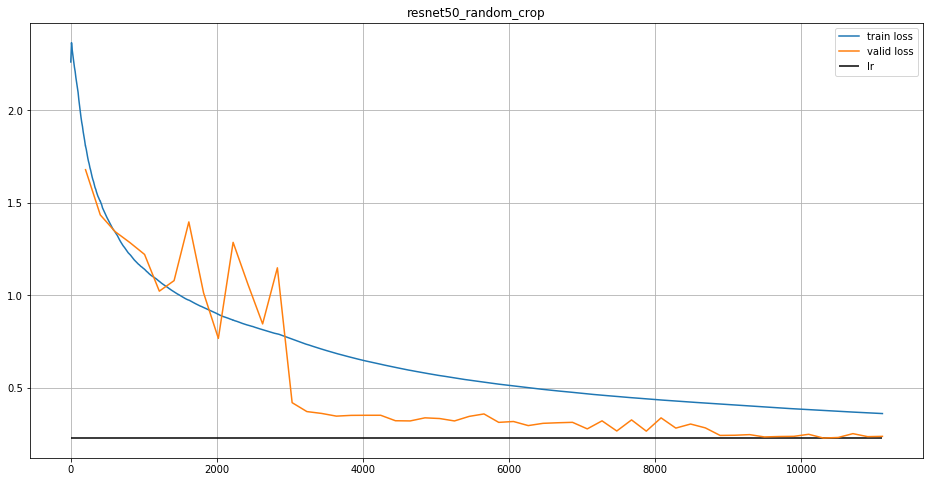

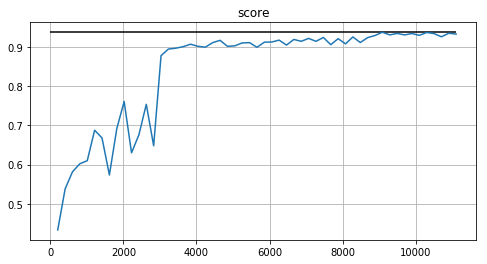

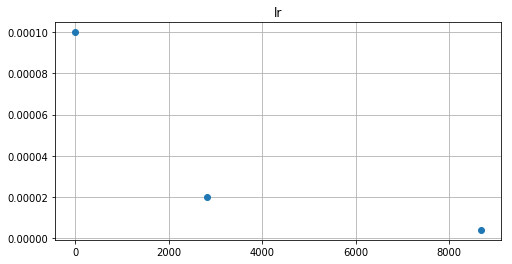

In [80]:
plot('resnet50_random_crop')

Time 1:20:37.132410
Best score 0.926697
Best valid loss 0.271772


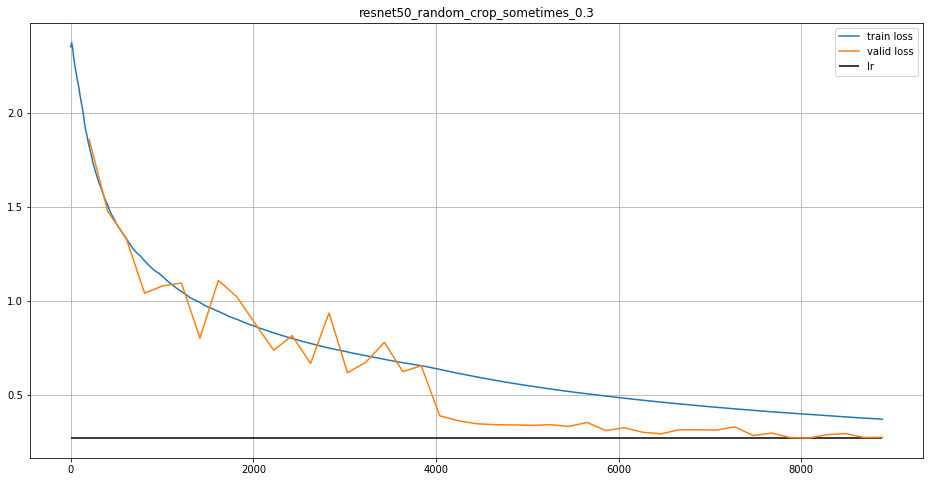

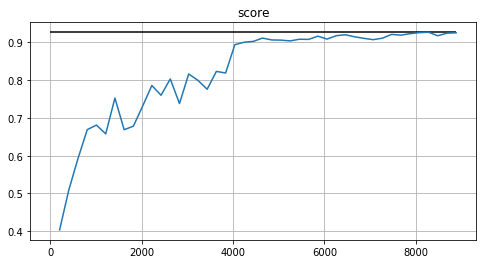

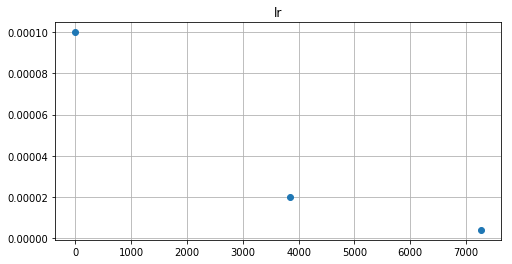

In [78]:
plot('resnet50_random_crop_sometimes_0.3')

Time 1:10:52.828450
Best score 0.926594
Best valid loss 0.272665


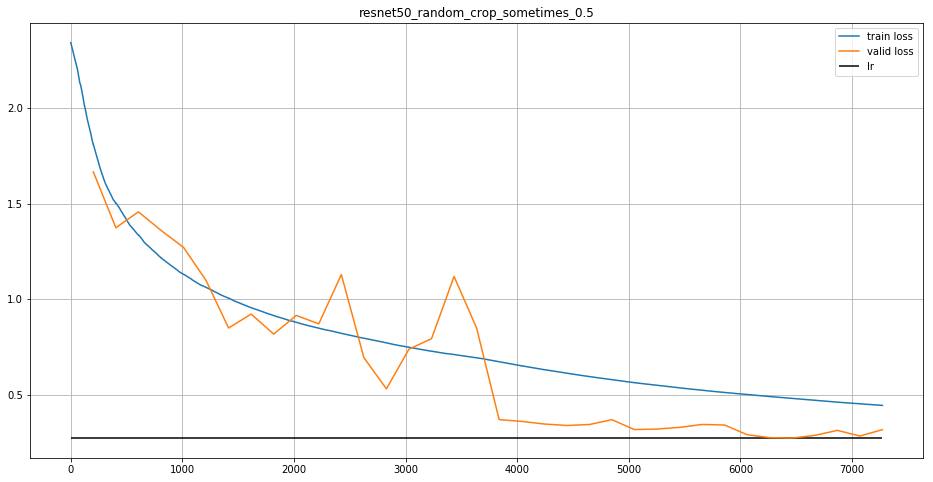

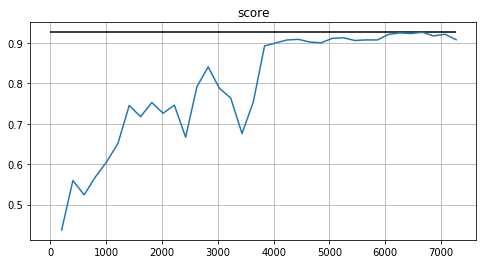

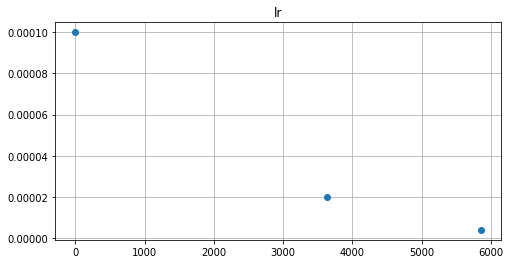

In [79]:
plot('resnet50_random_crop_sometimes_0.5')

Time 1:08:58.145752
Best score 0.898507
Best valid loss 0.385972


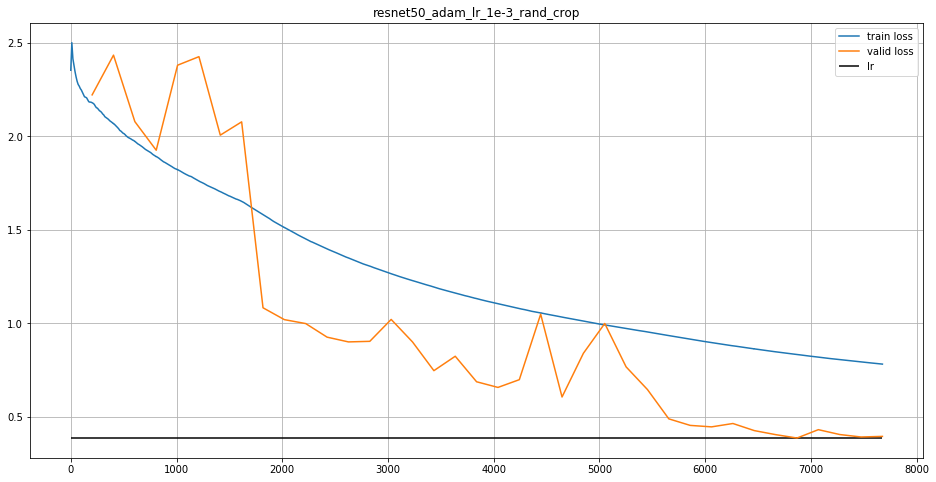

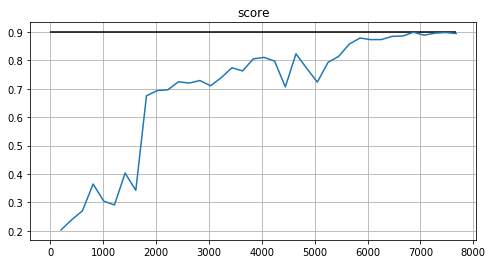

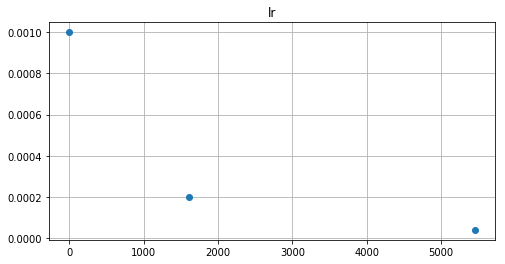

In [81]:
plot('resnet50_adam_lr_1e-3_rand_crop')

Time 1:22:57.044876
Best score 0.882442
Best valid loss 0.428795


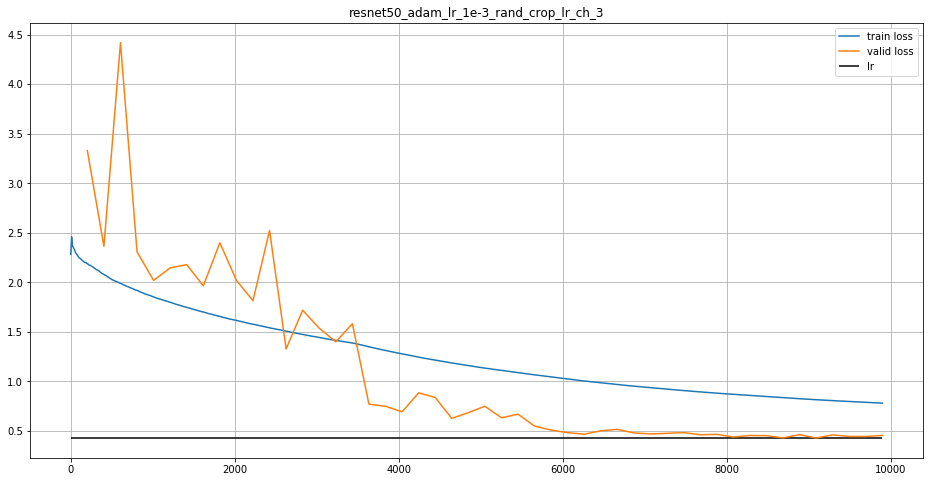

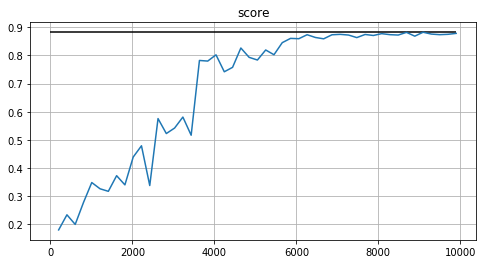

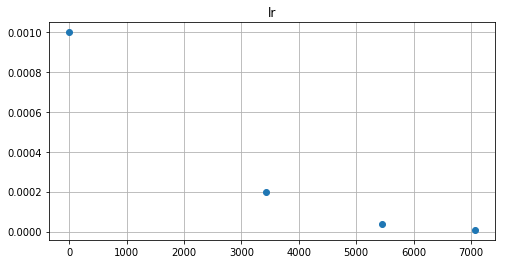

In [82]:
plot('resnet50_adam_lr_1e-3_rand_crop_lr_ch_3')

Time 1:20:39.437923
Best score 0.943156
Best valid loss 0.210059


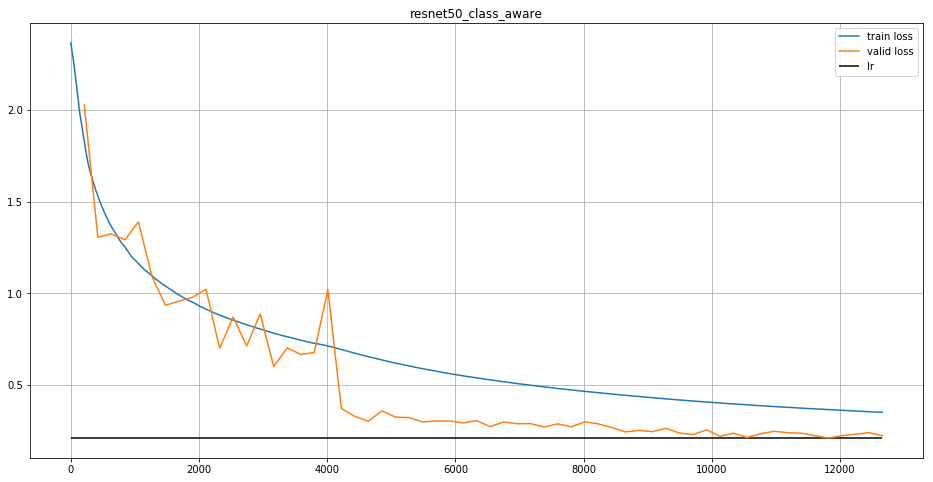

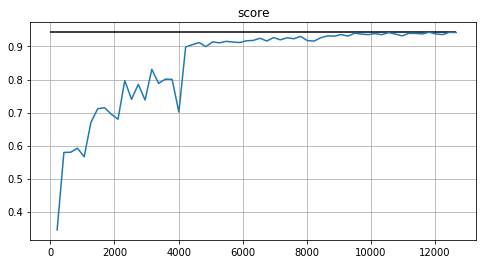

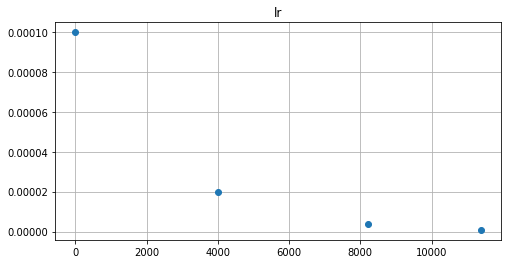

In [83]:
plot('resnet50_class_aware')

Time 2:45:30.096992
Best score 0.966411
Best valid loss 0.130816


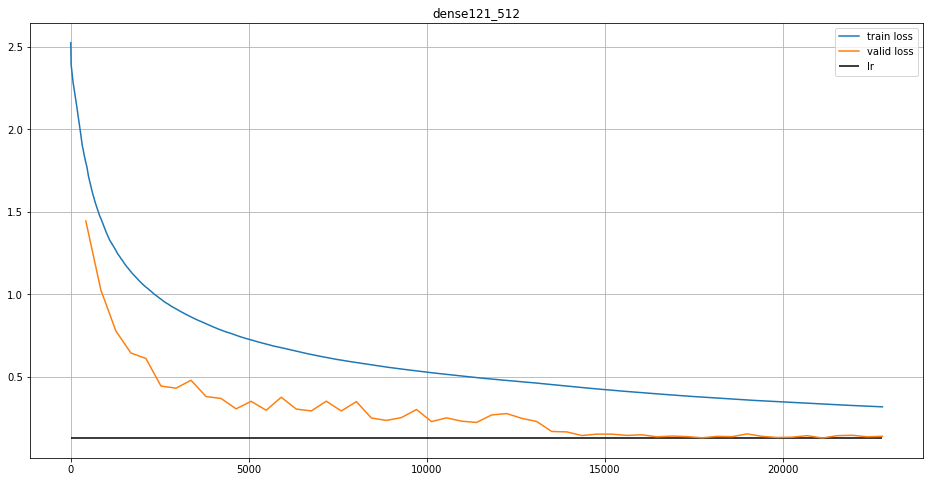

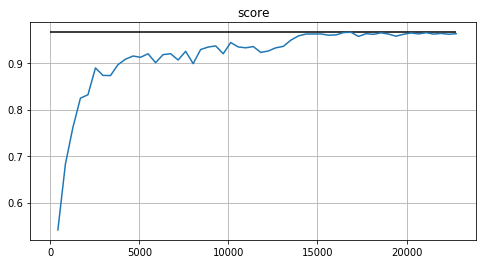

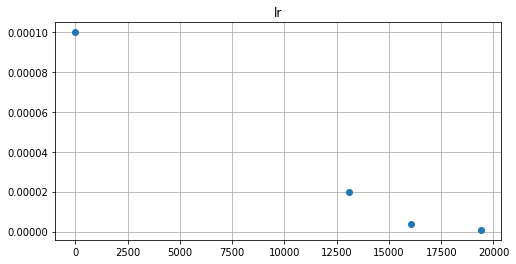

In [84]:
plot('dense121_512')

Time 1:37:44.161648
Best score 0.940528
Best valid loss 0.172793


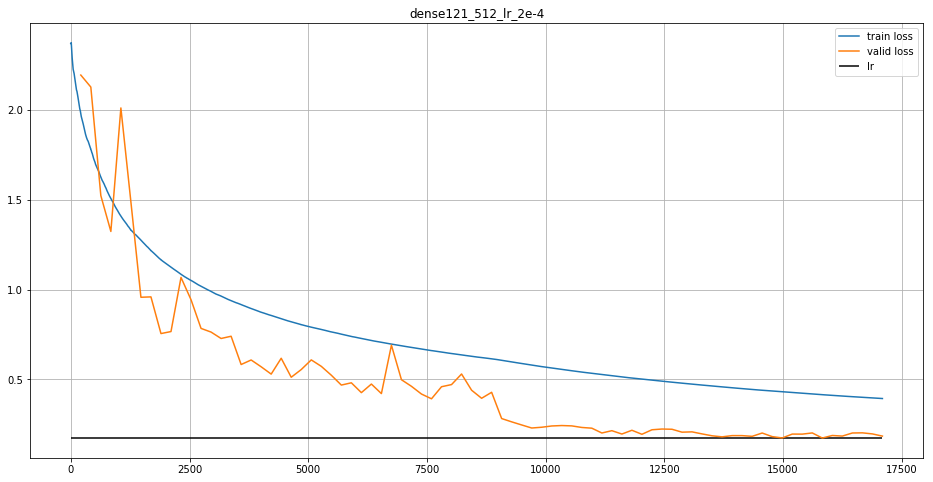

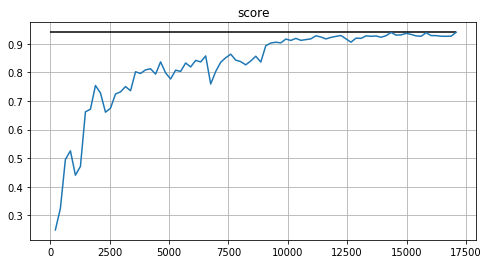

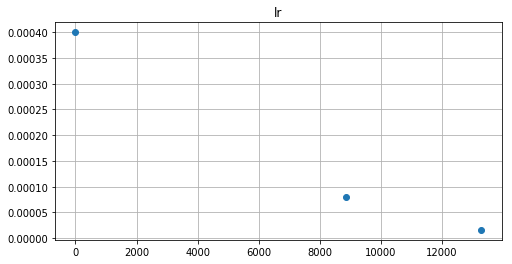

In [85]:
plot('dense121_512_lr_2e-4')

Time 1:42:43.190574
Best score 0.942011
Best valid loss 0.164259


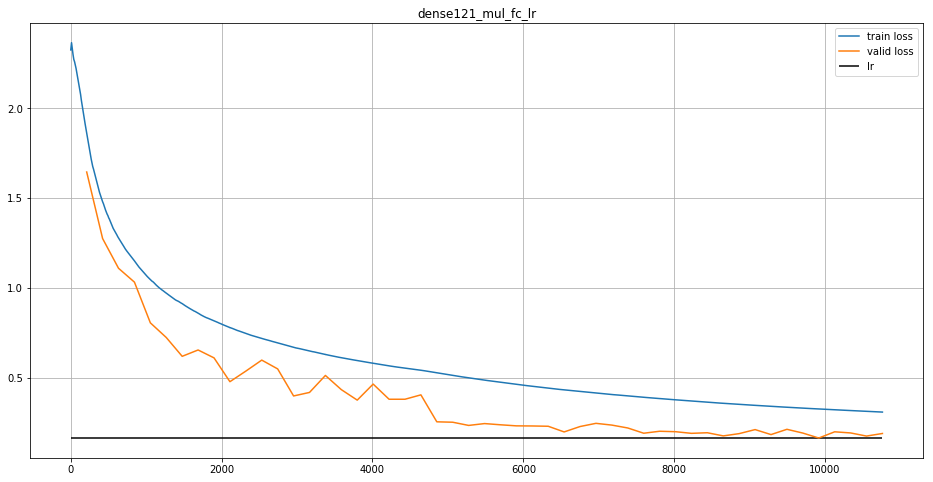

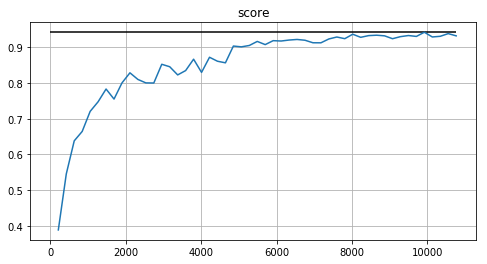

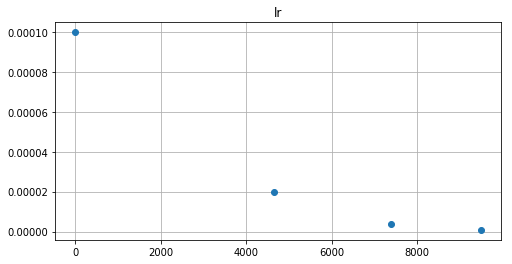

In [93]:
plot('dense121_mul_fc_lr')

Time 1:28:54.321826
Best score 0.934308
Best valid loss 0.188706


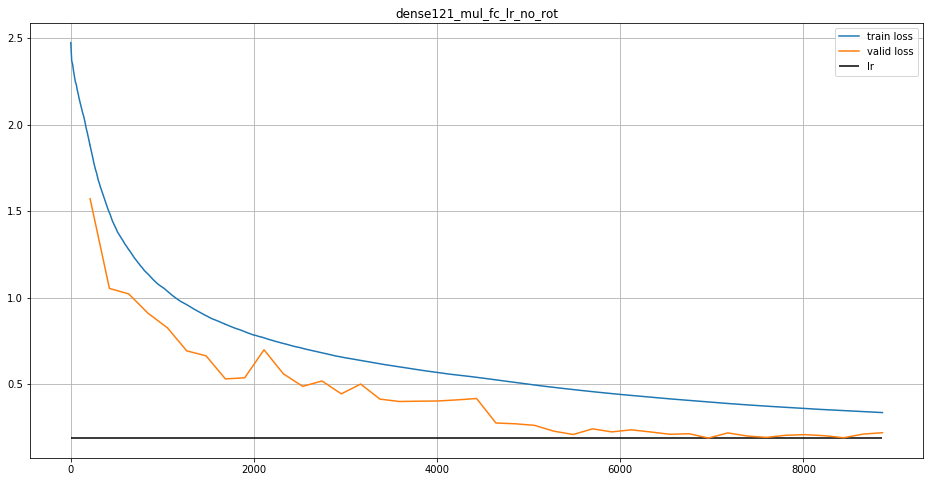

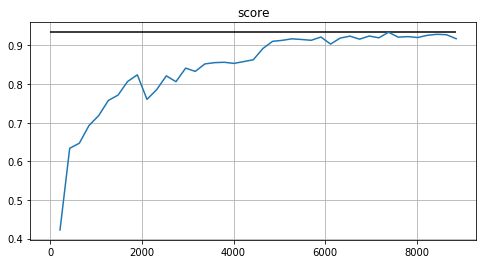

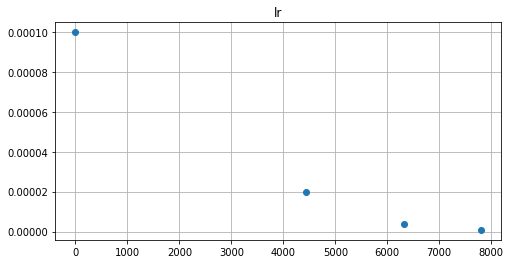

In [94]:
plot('dense121_mul_fc_lr_no_rot')